<a href="https://colab.research.google.com/github/Seolyeong/py17/blob/master/wk10_py_data_science_II_py17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python data science: pandas & graphics wokout

## Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### [1] Make data, Series, and DataFrame

- series는 벡터 위주
- 데이터는 인덱스 역할

### Series

In [2]:
# Creating a Series by passing a list of values
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))   # 위에서 만든 날짜를 인덱스로 사용
df

,A,B,C,D
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132


In [5]:
# check types of df  --> same type
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [7]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
# check types of df2 --> different types
# pandas는 다양한 데이터 구조를 담을 수 있는 구조이다.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### [2] Handling data

In [9]:
# head() = 상위 5개, head(2) = 상위 2개
df.head()

,A,B,C,D
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-05,0.452196,0.329874,-0.787732,2.594476


In [10]:
# tail(3) = 하위 3개
df.tail(3)

,A,B,C,D
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132


In [11]:
# Display the index, columns, and the underlying NumPy data:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.442063,0.238754,0.371208,0.045238
std,0.353283,0.306731,1.042220,1.494518
min,-0.115531,-0.283796,-0.787732,-1.431602
25%,0.289964,0.164421,-0.502144,-1.018928
50%,0.507366,0.256207,0.386196,-0.215175
75%,0.584611,0.403163,1.137161,0.565519
max,0.925321,0.617934,1.653361,2.594476


In [14]:
# describe()는 숫자만 처리해줌
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [15]:
# Transposing your dataframe:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.591969,0.925321,0.235887,-0.115531,0.452196,0.562535
B,0.158381,0.617934,-0.283796,0.182539,0.329874,0.427592
C,-0.570222,1.653361,-0.297908,1.159448,-0.787732,1.070301
D,-1.431602,-0.192319,-0.238032,-1.279227,2.594476,0.818132


#### Sorting

In [16]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=False) # axis = 0는 행

,A,B,C,D
2013-01-06,0.562535,0.427592,1.070301,0.818132
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-01,0.591969,0.158381,-0.570222,-1.431602


In [17]:
df.sort_index(axis=1, ascending=False) # axis = 1는 열

,D,C,B,A
2013-01-01,-1.431602,-0.570222,0.158381,0.591969
2013-01-02,-0.192319,1.653361,0.617934,0.925321
2013-01-03,-0.238032,-0.297908,-0.283796,0.235887
2013-01-04,-1.279227,1.159448,0.182539,-0.115531
2013-01-05,2.594476,-0.787732,0.329874,0.452196
2013-01-06,0.818132,1.070301,0.427592,0.562535


In [18]:
# Sorting by values:
df.sort_values(by='B') #, ascending=False)

,A,B,C,D
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132
2013-01-02,0.925321,0.617934,1.653361,-0.192319


#### Selecting data by indexing and slicing

> **at, iat, loc, iloc**
> - loc는 로케이션, i는 인덱스(index)를 의미함

In [19]:
# Selecting a single column, which yields a Series
df['A']

2013-01-01    0.591969
2013-01-02    0.925321
2013-01-03    0.235887
2013-01-04   -0.115531
2013-01-05    0.452196
2013-01-06    0.562535
Freq: D, Name: A, dtype: float64

In [20]:
# Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032


In [21]:
df['20130102':'20130104'] # 인덱스가 아닌 값인 경우는 지전된 범위가 다 선택된다.

,A,B,C,D
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-04,-0.115531,0.182539,1.159448,-1.279227


#### Selecting data by label

In [22]:
df

,A,B,C,D
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132


In [23]:
df.loc[dates[0]]   # loc() # 0 번째 데이터 인덱스에 해당하는 값을 가져와라

A    0.591969
B    0.158381
C   -0.570222
D   -1.431602
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']] # 행은 전부다 열은 A, B이다.

,A,B
2013-01-01,0.591969,0.158381
2013-01-02,0.925321,0.617934
2013-01-03,0.235887,-0.283796
2013-01-04,-0.115531,0.182539
2013-01-05,0.452196,0.329874
2013-01-06,0.562535,0.427592


#### [도전코딩] 
> - 첫번째는 에러
> - **중요**
> - Select data for first two days AND comumn 3,4 from df.

In [0]:
#df.loc[1:3,['C','D']]
# df.loc['20130101':'20130102',['C','D']]
# df.loc[dates[:2],['C','D']]

#### Selecting data by position  (iloc())

In [26]:
df

,A,B,C,D
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132


In [27]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨.

A   -0.115531
B    0.182539
C    1.159448
D   -1.279227
Name: 2013-01-04 00:00:00, dtype: float64

In [28]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
df.iloc[:2,2:4]

,C,D
2013-01-01,-0.570222,-1.431602
2013-01-02,1.653361,-0.192319


In [29]:
# Select one item
df.iloc[1,1]

0.6179335040011276

#### Selecting data by Boolean indexing

In [30]:
df

,A,B,C,D
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-04,-0.115531,0.182539,1.159448,-1.279227
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132


In [31]:
df[df.A > 0] # df에 있는 요수 중 A가 0보다 큰 것

,A,B,C,D
2013-01-01,0.591969,0.158381,-0.570222,-1.431602
2013-01-02,0.925321,0.617934,1.653361,-0.192319
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032
2013-01-05,0.452196,0.329874,-0.787732,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132


In [32]:
df[df > 0]  # df 모든 값 중에서 0보다 큰 값

,A,B,C,D
2013-01-01,0.591969,0.158381,NaN,NaN
2013-01-02,0.925321,0.617934,1.653361,NaN
2013-01-03,0.235887,NaN,NaN,NaN
2013-01-04,NaN,0.182539,1.159448,NaN
2013-01-05,0.452196,0.329874,NaN,2.594476
2013-01-06,0.562535,0.427592,1.070301,0.818132


### Setting (데이터 재구성 또는 확장)

In [33]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
df['F'] = s1

In [35]:
df  # 기존 df의 구조에 맞춰서 재구성됨.

,A,B,C,D,F
2013-01-01,0.591969,0.158381,-0.570222,-1.431602,NaN
2013-01-02,0.925321,0.617934,1.653361,-0.192319,1.0
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032,2.0
2013-01-04,-0.115531,0.182539,1.159448,-1.279227,3.0
2013-01-05,0.452196,0.329874,-0.787732,2.594476,4.0
2013-01-06,0.562535,0.427592,1.070301,0.818132,5.0


In [36]:
# Setting values by label:
df.at[dates[0],'A'] = 0  # 1월 1일의 A 값을 0으로 하라
df

,A,B,C,D,F
2013-01-01,0.000000,0.158381,-0.570222,-1.431602,NaN
2013-01-02,0.925321,0.617934,1.653361,-0.192319,1.0
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032,2.0
2013-01-04,-0.115531,0.182539,1.159448,-1.279227,3.0
2013-01-05,0.452196,0.329874,-0.787732,2.594476,4.0
2013-01-06,0.562535,0.427592,1.070301,0.818132,5.0


In [37]:
# Setting values by position (index):
df.iat[0,1] = 0  # 1월 1일의 0,1 인덱스(A, B)에 값을 0으로
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.570222,-1.431602,NaN
2013-01-02,0.925321,0.617934,1.653361,-0.192319,1.0
2013-01-03,0.235887,-0.283796,-0.297908,-0.238032,2.0
2013-01-04,-0.115531,0.182539,1.159448,-1.279227,3.0
2013-01-05,0.452196,0.329874,-0.787732,2.594476,4.0
2013-01-06,0.562535,0.427592,1.070301,0.818132,5.0


In [38]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.570222,5,NaN
2013-01-02,0.925321,0.617934,1.653361,5,1.0
2013-01-03,0.235887,-0.283796,-0.297908,5,2.0
2013-01-04,-0.115531,0.182539,1.159448,5,3.0
2013-01-05,0.452196,0.329874,-0.787732,5,4.0
2013-01-06,0.562535,0.427592,1.070301,5,5.0


### Missing data

- pandas primarily uses the value np.nan to represent missing data. 
- pandas는 nan값을 missing data에 할당한다.

In [39]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.570222,5,NaN,NaN
2013-01-02,0.925321,0.617934,1.653361,5,1.0,NaN
2013-01-03,0.235887,-0.283796,-0.297908,5,2.0,NaN
2013-01-04,-0.115531,0.182539,1.159448,5,3.0,NaN


In [40]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.570222,5,NaN,1.0
2013-01-02,0.925321,0.617934,1.653361,5,1.0,1.0
2013-01-03,0.235887,-0.283796,-0.297908,5,2.0,NaN
2013-01-04,-0.115531,0.182539,1.159448,5,3.0,NaN


In [41]:
# To drop any rows that have missing data.
# dropna는 숫자가 아닌것을 전부다 없앤다.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.925321,0.617934,1.653361,5,1.0,1.0


In [42]:
# Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.570222,5,5.0,1.0
2013-01-02,0.925321,0.617934,1.653361,5,1.0,1.0
2013-01-03,0.235887,-0.283796,-0.297908,5,2.0,5.0
2013-01-04,-0.115531,0.182539,1.159448,5,3.0,5.0


In [43]:
# Get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.570222,5,NaN
2013-01-02,0.925321,0.617934,1.653361,5,1.0
2013-01-03,0.235887,-0.283796,-0.297908,5,2.0
2013-01-04,-0.115531,0.182539,1.159448,5,3.0
2013-01-05,0.452196,0.329874,-0.787732,5,4.0
2013-01-06,0.562535,0.427592,1.070301,5,5.0


In [45]:
  df.mean() # 계산시 NaN이 있으면 그것을 그냥 빼버린다.

A    0.343401
B    0.212357
C    0.371208
D    5.000000
F    3.000000
dtype: float64

In [46]:
df.mean(0) # 각 열(세로)로 평균을 낸다.

A    0.343401
B    0.212357
C    0.371208
D    5.000000
F    3.000000
dtype: float64

In [47]:
df.mean(1) # 각 행(가로)로 평균을 낸다.

2013-01-01    1.107444
2013-01-02    1.839323
2013-01-03    1.330836
2013-01-04    1.845291
2013-01-05    1.798868
2013-01-06    2.412086
Freq: D, dtype: float64

***

# Chapter 12-03
## matplotlib을 사용한다

### plot( )로 그래프를 그린다

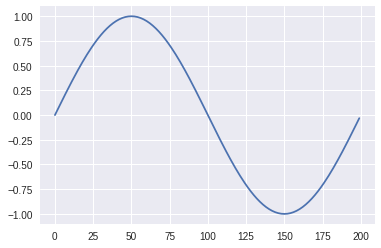

In [48]:
# sin그래프를 그린다
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s)    # sin의 그래프를 그림

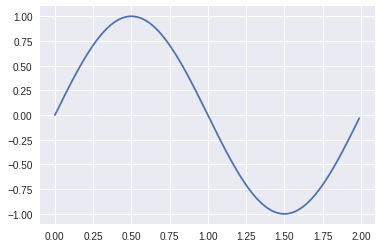

In [49]:
 plt.plot(np.arange(0.0, 2.0, 0.01),s)

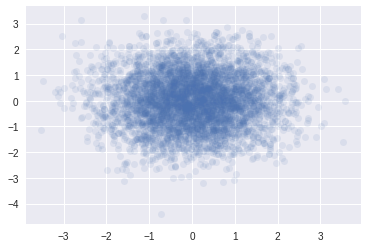

In [50]:
# 산포도(scatter plot)를 그린다
# 인수 마커를 사용하여 산포도를 작성
x = np.random.randn(5000)    # 표준 정규 분포에 따라 난수 생성
y = np.random.randn(5000)
t = plt.plot(x, y, 'o', alpha=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


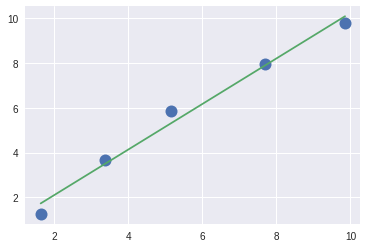

In [51]:
# 그래프를 중복해 그림
x = np.array([1.628, 3.363, 5.145, 7.683, 9.855])
y = np.array([1.257, 3.672, 5.841, 7.951, 9.775])
# 최소 자승법(least square method)으로 데이터를 근사하는 직선을 구함
a = np.array([x, np.ones(x.size)])
a = a.T
m, c = np.linalg.lstsq(a, y)[0]
t = plt.plot(x, y, 'o', ms=12)   # 데이터를 그림
t = plt.plot(x, (m*x+c))  # 근사직선을 그림, m:기울기,c:bias(절편)

### plot( )로 그림을 제어

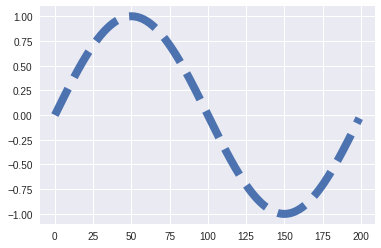

In [52]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=8)

### 문자를 삽입한다

In [0]:
# 표시용 폰트 지정
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'

In [0]:
# 시스템에서 사용 가능한 글꼴 목록을 표시
import matplotlib.font_manager as fm
fontsfamily = fm.findSystemFonts()

In [55]:
fontsfamily[:5]

['/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf']

***

# Chapter 12-04
## 일본 인구를 시각화한다

### 인구 데이터를 읽어 들임

In [57]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving female_1944_2014.csv to female_1944_2014.csv
Saving male_1944_2014.csv to male_1944_2014.csv
Saving total_fertility_rate.csv to total_fertility_rate.csv
User uploaded file "female_1944_2014.csv" with length 7323 bytes
User uploaded file "male_1944_2014.csv" with length 7218 bytes
User uploaded file "total_fertility_rate.csv" with length 550 bytes


In [58]:
ls

female_1944_2014.csv  sample_data/
male_1944_2014.csv    total_fertility_rate.csv


In [0]:
# 1944년부터 2014년까지의 5계층 단계별로 인구를 남녀별로 읽어 들임
import numpy as np

p_male = np.loadtxt('male_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))  # skiprows = 첫번째 행은 뺀다. 
p_female = np.loadtxt('female_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))

In [60]:
# 계급별과 연도별로 인구를 계산한다.
# 남녀 5세씩의 단계별로 인구를 합계
p_total = p_male+p_female
print(p_total)
# 연도별 인구로 수정
p_yearly = p_total.sum(axis=1)
p_yearly

[[8712. 8803. 8684. ...    0.    0.    0.]
 [9251. 8581. 8645. ...    0.    0.    0.]
 [7858. 8734. 8692. ...    0.    0.    0.]
 ...
 [5272. 5407. 5868. ... 1146.  331.   51.]
 [5239. 5361. 5790. ... 1215.  343.   55.]
 [5213. 5307. 5713. ... 1305.  352.   60.]]


array([ 73063.,  71999.,  73115.,  78101.,  80003.,  81771.,  83199.,
        84571.,  85854.,  87034.,  88294.,  89277.,  90258.,  91086.,
        92010.,  92971.,  93420.,  94285.,  95179.,  96157.,  97187.,
        98275.,  99054., 100244., 101410., 102649., 103719., 105013.,
       107334., 108709., 110050., 111940., 113086., 114153., 115174.,
       116131., 117061., 117879., 118693., 119485., 120237., 121046.,
       121672., 122264., 122784., 123254., 123611., 124044., 124452.,
       124765., 125033., 125568., 125865., 126169., 126485., 126685.,
       126923., 127289., 127433., 127618., 127687., 127766., 127769.,
       127767., 127690., 127509., 128057., 127799., 127513., 127295.,
       127082.])

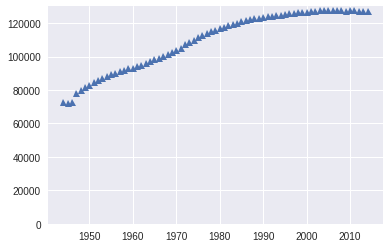

In [61]:
# 연도별 인구를 그래프화 한다
%matplotlib inline
import matplotlib.pyplot as plt

t = plt.plot(range(1944, 2015), p_yearly, '^')
plt.ylim((0, 130000)) # ylim은 y축 범위
plt.grid(True)

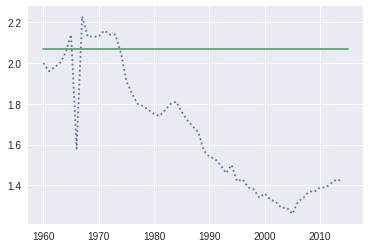

In [62]:
# 출생률(합계 특수 출생률) 그래프를 그린다
# 1960년에서 2014년을 읽어 들임
tfr = np.loadtxt('total_fertility_rate.csv', delimiter=",", skiprows=1)
# 출산율 그래프를 그린다
t = plt.plot(range(1960, 2015), tfr, ls=":")
# 인구 치환 경계선을 2.07로 하여 선을 그림
t = plt.plot([1960, 2015], [2.07, 2.07])

### 인구 피라미드를 그린다

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3)
    ax[0].set(ylim=(0, 100), xlim=(0, 6000))
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_right() # y값 눈금을 오른쪽으로
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off')
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])

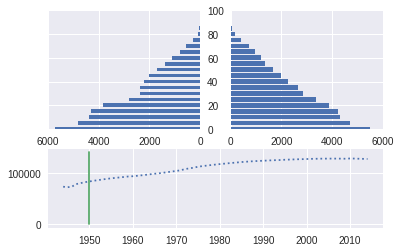

In [67]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(1950, p_male, p_female, p_yearly,
            1944, 2014)
# 1950년도의 인구 피라미드, 남자인구, 여자인구, 전체인구, 1994년 부터 2014년까지

> year를 변경해서 그래프를 그려보시오.

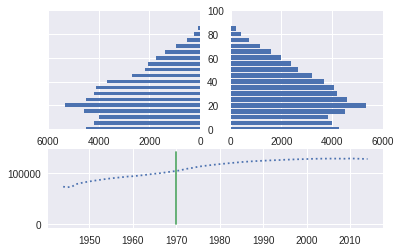

In [68]:
show_pgraph(1970, p_male, p_female, p_yearly,
            1944, 2014)
# 1970년도의 인구 피라미드, 남자인구, 여자인구, 전체인구, 1994년 부터 2014년까지

***

## 특강안내

### VR 응용과 전망 (HC 관련 내용 포함)

### 11월8일(목) 4시~6시, 신어관 101호 강당

***

### [wk10] homework

#### 다음 파이썬 노트북 [tips_reshape](https://github.com/Redwoods/Py/blob/master/py-basic/tips/Tips_py_reshape.ipynb) 을 colab에서 실행하고 설명을 추가해서 github에 올리시오.(마감: 2018.11.11(일). 24:00)

> 제출 파일명: Summary_reshape.ipynb

***